In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif, f_classif

from imblearn.over_sampling import SMOTE

from sklearn.metrics import matthews_corrcoef, make_scorer, f1_score, confusion_matrix , classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
N_SPLITS = 5
SEED = 121

In [3]:
input_folder = 'data/'
def read_data(file, labels):
    data = pd.read_csv(input_folder+file, index_col=0).T

    if len(labels) == 0:
        return (data, np.array([]))

    X = data.iloc[:, :-len(labels)]
    y = data[labels]
    return (X, y)


X1, Y1 = read_data('Dataset_1_Training.csv', ["CO: 1", "CO: 2"])
co1 = Y1["CO: 1"]
co2 = Y1["CO: 2"]

X1_t, _ = read_data('Dataset_1_Testing.csv', [])

X2, Y2 = read_data('Dataset_2_Training.csv', [
                   "CO: 3", "CO: 4", "CO: 5", "CO: 6"])
co3 = Y2["CO: 3"]
co4 = Y2["CO: 4"]
co5 = Y2["CO: 5"]
co6 = Y2["CO: 6"]

X2_t, _ = read_data('Dataset_2_Testing.csv', [])

# Choosing one class to work on

In [4]:
target = "CO: 4"
X = X2
y = co4.astype(np.int32)
X_gen_res = X2_t

In [5]:
X.shape, y.shape, X_gen_res.shape, y.value_counts()

((340, 54675),
 (340,),
 (214, 54675),
 0    289
 1     51
 Name: CO: 4, dtype: int64)

# Lets check if the classes are balanced?

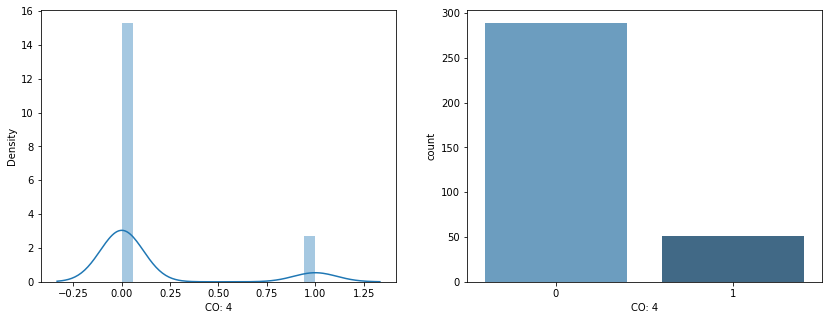

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.distplot(y, ax=ax[0])
sns.countplot(y, ax=ax[1], palette="Blues_d")
plt.show()

## Lets see the feature distribution

In [7]:
# f, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
# for index, value in enumerate(X.columns[:14]):
#     sns.distplot(X[value], ax=ax[index//4, index % 4])

# f.delaxes(ax[3, 2])
# f.delaxes(ax[3, 3])
# plt.tight_layout()
# plt.show()


# Feature Selection

## 1. Standard Scaling

In [8]:
def pre_process(X ,p_values):
    X_std = StandardScaler().fit_transform(X)
    X = pd.DataFrame(X_std, columns=X.columns, index=X.index)
    X = X[p_values.index]
    return X

In [9]:
X_std = StandardScaler().fit_transform(X)

X = pd.DataFrame(X_std, columns=X.columns, index=X.index)
X.head()

ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_54666,gene_54667,gene_54668,gene_54669,gene_54670,gene_54671,gene_54672,gene_54673,gene_54674,gene_54675
Train_001,-0.974549,0.177456,-0.975165,0.888951,-0.863600,0.495873,0.460940,-0.066280,1.258382,1.047692,...,0.274843,0.972255,-0.635516,-0.517119,1.704640,1.408425,-0.955194,-0.469993,-0.780520,-0.249585
Train_002,-0.124604,0.490235,-0.729952,-0.771489,-0.058306,0.893639,-0.034932,-0.378934,0.427044,-0.940177,...,0.410651,1.066582,0.354197,0.568591,0.207588,0.717230,0.349897,-2.165594,-1.411680,-1.170157
Train_003,-1.723075,-0.480285,-1.267352,-1.223965,0.020118,0.218001,-2.009241,-1.277633,1.589799,-0.592714,...,-2.111960,-1.988868,-2.223436,-2.135475,-0.888887,0.520384,-1.111456,0.206834,0.097876,-0.819889
Train_004,0.533273,-0.493158,1.579199,1.389714,-0.522521,1.267149,0.344336,0.714309,0.100853,-0.047704,...,1.275086,1.415029,1.050437,1.019993,-0.132735,1.695104,1.249998,-0.315001,-0.070656,0.552066
Train_005,1.144928,1.064702,-1.511770,-1.095708,-0.607514,-0.648806,0.301194,-2.026039,1.358522,-0.121317,...,1.586927,0.956179,0.883156,1.212241,-1.166251,-1.620488,-1.376700,0.700079,-0.020721,-1.673193


## 2. Test train split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=SEED)

In [11]:
y_train.value_counts()

0    202
1     36
Name: CO: 4, dtype: int64

## 3. using SMOTE to balance the classes

In [12]:
# smote = SMOTE(sampling_strategy='minority')
# X_train, y_train = smote.fit_resample(X_train, y_train)

# y_train.value_counts()

## 4. If SMOTE is not allowed we can Oversample the classes

In [13]:
# test = pd.concat([X_train, y_train], axis=1)

# df_class_0 = test[test["CO: 3"]==0]
# df_class_1 = test[test["CO: 3"]==1]

# print(df_class_0.shape,df_class_1.shape)

# df_class_1_over = df_class_1.sample(len(df_class_0), replace=True)
# df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# print('Random over-sampling:')
# print(df_test_over["CO: 3"].value_counts())

# X_train = df_test_over.drop("CO: 3",axis='columns')
# y_train = df_test_over["CO: 3"]

## 5. shape of the data before feteature selection

In [14]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((238, 54675), (238,), (102, 54675), (102,))

## 6. Feature Selection Using ANOVA

In [15]:
selector = f_classif(X_train, y_train)
p_values = pd.Series(selector[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values = p_values[p_values < 0.05]
X_train = X_train[p_values.index]
X_test = X_test[p_values.index]

## 7. shape of the data after feature selection

In [16]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((238, 7236), (238,), (102, 7236), (102,))

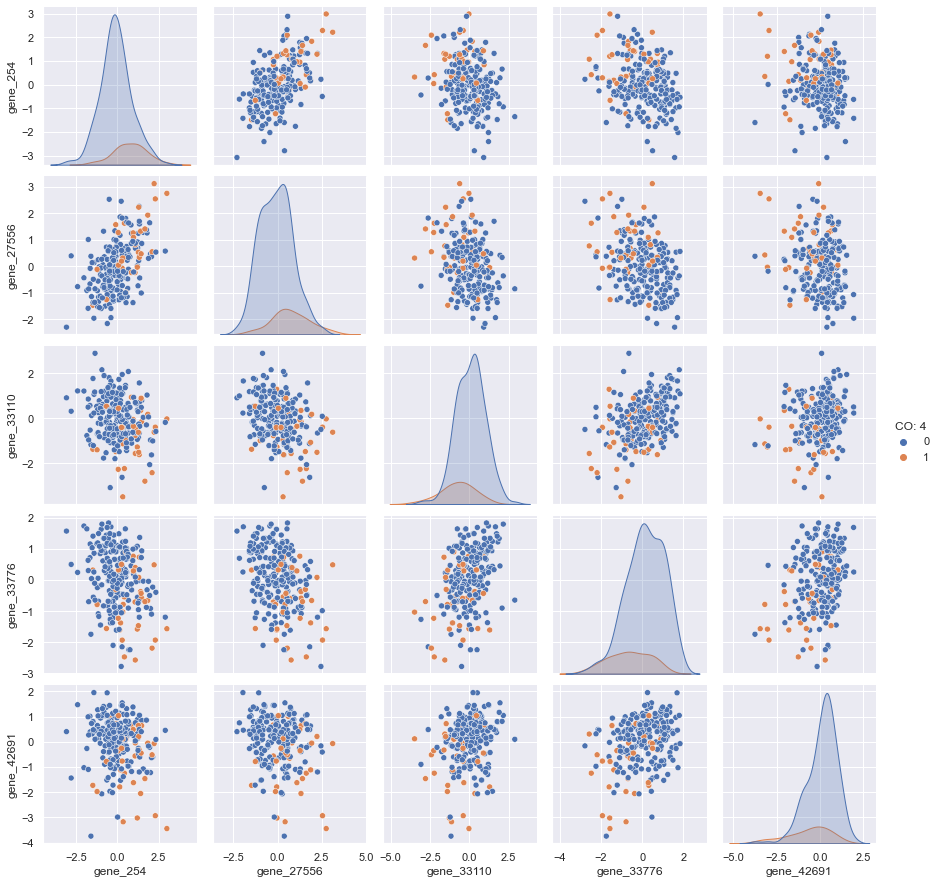

In [17]:
sns.set()
cols = X_train.columns[:5]
temp = pd.concat([X_train[cols],y_train],axis=1)
sns.pairplot(temp, hue= target, size = 2.5)
plt.show()

# Modeling and Evaluation

1. Generic function to train the model

In [30]:
def run_model(model, X, y, X_test, y_test):
    model.fit(X, y)
    y_test_pred = model.predict(X_test)

    # Testing set performance
    test_mcc = matthews_corrcoef(y_test, y_test_pred)  # Calculate MCC
    return test_mcc



def run_model_(model, X, y, X_test, y_test, n_fold=2):
    cv = cross_val_score(model, X, y,  cv=n_fold, scoring=make_scorer(
        matthews_corrcoef, greater_is_better=True))

    print(f"Cross validation Avg. f1_score: {cv.mean()}")

    model.fit(X, y)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(classification_report(y_train, y_train_pred))
    print(classification_report(y_test, y_test_pred))

    # Testing set performance
    test_mcc = matthews_corrcoef(y_test, y_test_pred)  # Calculate MCC
    print(f"Testing MCC: {test_mcc}")
    
    # Plotting heatmap
    sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,)


# LR

Cross validation Avg. f1_score: 0.31018518518518523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00        36

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        87
           1       1.00      0.13      0.24        15

    accuracy                           0.87       102
   macro avg       0.94      0.57      0.58       102
weighted avg       0.89      0.87      0.83       102

Testing MCC: 0.34058772731852804


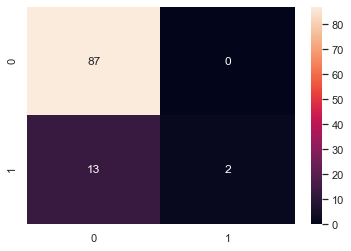

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', C=2, penalty='l2', max_iter=1000)
run_model_(lr, X_train, y_train, X_test, y_test, 2)


# Tuning the hyperparameters for LR

  0%|          | 0/200 [00:00<?, ?it/s]

<AxesSubplot:>

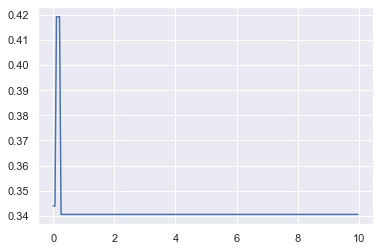

In [21]:
from tqdm.notebook import tqdm

mcc_scores = []
search_space = np.arange(0.01, 10, 0.05)

for i in tqdm(search_space):
    model = LogisticRegression(C=i, penalty='l2', class_weight='balanced', max_iter=1000)
    mcc_scores.append(run_model(model, X_train, y_train, X_test, y_test))

sns.lineplot(search_space, mcc_scores)

In [22]:
 mcc_scores[np.argmax(np.array(mcc_scores))]


0.4192345116490003

Cross validation Avg. f1_score: 0.31018518518518523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00        36

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        87
           1       1.00      0.13      0.24        15

    accuracy                           0.87       102
   macro avg       0.94      0.57      0.58       102
weighted avg       0.89      0.87      0.83       102

Testing MCC: 0.34058772731852804


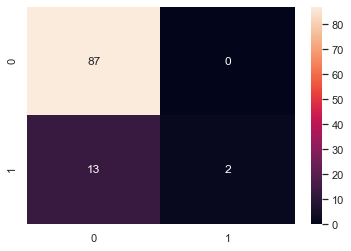

In [45]:
lr = LogisticRegression(
    C=0.4192345116490003, penalty='l2', class_weight='balanced', max_iter=1000)
run_model_(lr, X_train, y_train, X_test, y_test, 2)


# AdaBoost

Cross validation Avg. f1_score: 0.2388591800356506
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       202
           1       0.96      0.61      0.75        36

    accuracy                           0.94       238
   macro avg       0.95      0.80      0.85       238
weighted avg       0.94      0.94      0.93       238

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        87
           1       0.25      0.20      0.22        15

    accuracy                           0.79       102
   macro avg       0.56      0.55      0.55       102
weighted avg       0.78      0.79      0.78       102

Testing MCC: 0.10613372610104647


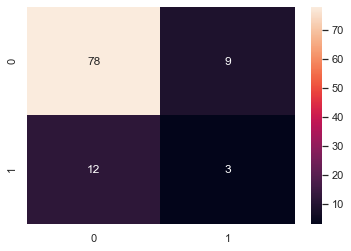

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_tree = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=7, learning_rate=.9, random_state=SEED)

run_model_(ada_tree, X_train, y_train, X_test, y_test, 2)


# Tuning the hyperparameters for AdaBoost

In [25]:

search_space_lr = np.arange(0.01, 1, 0.05)
search_space_max_depth = np.arange(1, 5, 1)
search_space_estimators = np.arange(2, 30, 5)

mcc_scores_ada_dt = []

for i in tqdm(search_space_max_depth):
    for j in search_space_lr:
        for k in search_space_estimators:
            model = AdaBoostClassifier(
                DecisionTreeClassifier(max_depth=i), algorithm="SAMME", n_estimators=k, learning_rate=j, random_state=SEED)
            
            temp = run_model(model, X_train, y_train, X_test, y_test)

            mcc_scores_ada_dt.append((temp, (i, j, k)))
            

  0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
sorted(mcc_scores_ada_dt, reverse=True)[0:5]

[(0.4192345116490003, (2, 0.46, 27)),
 (0.3439432714300406, (4, 0.51, 17)),
 (0.3439432714300406, (4, 0.31000000000000005, 27)),
 (0.3439432714300406, (4, 0.31000000000000005, 22)),
 (0.3439432714300406, (4, 0.31000000000000005, 17))]

Cross validation Avg. f1_score: 0.08966861598440545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00        36

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        87
           1       1.00      0.20      0.33        15

    accuracy                           0.88       102
   macro avg       0.94      0.60      0.63       102
weighted avg       0.90      0.88      0.85       102

Testing MCC: 0.4192345116490003


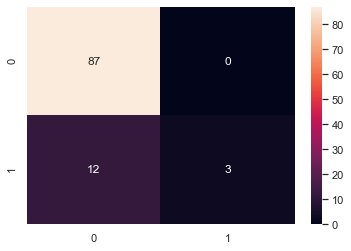

In [21]:
ada_tree = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=27, learning_rate=0.46, random_state=SEED)

run_model_(ada_tree, X_train, y_train, X_test, y_test, 2)

In [56]:

search_space_lr = np.arange(0.01, 1, 0.05)
search_space_max_depth = np.arange(1, 5, 1)
search_space_estimators = np.arange(2, 30, 5)

mcc_scores_ada_lr = []


for i in tqdm(search_space_lr):
    for j in search_space_estimators:
        model = AdaBoostClassifier(
            LogisticRegression(class_weight='balanced'), algorithm="SAMME", n_estimators=j, learning_rate=i, random_state=SEED)

        temp = run_model(model, X_train, y_train, X_test, y_test)

        mcc_scores_ada_lr.append((temp, (i, j)))


  0%|          | 0/20 [00:00<?, ?it/s]

In [57]:
sorted(mcc_scores_ada_lr, reverse=True)[0:5]


[(0.2491364395612199, (0.9600000000000001, 27)),
 (0.2491364395612199, (0.9600000000000001, 22)),
 (0.2491364395612199, (0.9600000000000001, 17)),
 (0.2491364395612199, (0.9600000000000001, 12)),
 (0.2491364395612199, (0.9600000000000001, 7))]

Cross validation Avg. f1_score: 0.35185185185185186
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00        36

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        87
           1       0.50      0.20      0.29        15

    accuracy                           0.85       102
   macro avg       0.69      0.58      0.60       102
weighted avg       0.82      0.85      0.83       102

Testing MCC: 0.2491364395612199


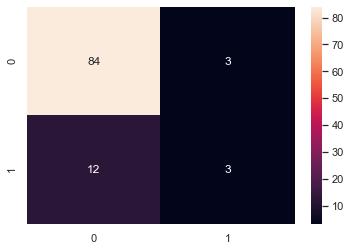

In [59]:
ada_lr = AdaBoostClassifier(
    LogisticRegression( class_weight='balanced'), algorithm="SAMME", n_estimators=7, learning_rate=0.95, random_state=SEED)

run_model_(ada_lr, X_train, y_train, X_test, y_test, 2)


# Random Forest 

Cross validation Avg. f1_score: 0.05263157894736842
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       202
           1       1.00      0.42      0.59        36

    accuracy                           0.91       238
   macro avg       0.95      0.71      0.77       238
weighted avg       0.92      0.91      0.90       238

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        87
           1       0.00      0.00      0.00        15

    accuracy                           0.85       102
   macro avg       0.43      0.50      0.46       102
weighted avg       0.73      0.85      0.79       102

Testing MCC: 0.0


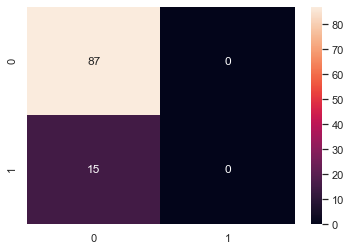

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=SEED)
run_model_(rf, X_train, y_train, X_test, y_test, 2)

# Tuning the hyperparameters for Random Forest

In [61]:
search_space_max_depth = np.arange(1, 10, 1)
search_space_estimators = np.arange(2, 50, 5)

mcc_scores_rf = []

for i in tqdm(search_space_max_depth):
    for j in search_space_estimators:
        model = rf = RandomForestClassifier(
            n_estimators=j, max_depth=i, random_state=SEED)

        temp = run_model(model, X_train, y_train, X_test, y_test)

        mcc_scores_rf.append((temp, (i, j)))


  0%|          | 0/9 [00:00<?, ?it/s]

In [62]:
sorted(mcc_scores_rf, reverse=True)[0:5]


[(0.34058772731852804, (9, 47)),
 (0.34058772731852804, (9, 42)),
 (0.34058772731852804, (8, 47)),
 (0.34058772731852804, (8, 37)),
 (0.34058772731852804, (7, 37))]

Cross validation Avg. f1_score: 0.10025062656641603
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      0.97      0.99        36

    accuracy                           1.00       238
   macro avg       1.00      0.99      0.99       238
weighted avg       1.00      1.00      1.00       238

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        87
           1       1.00      0.13      0.24        15

    accuracy                           0.87       102
   macro avg       0.94      0.57      0.58       102
weighted avg       0.89      0.87      0.83       102

Testing MCC: 0.34058772731852804


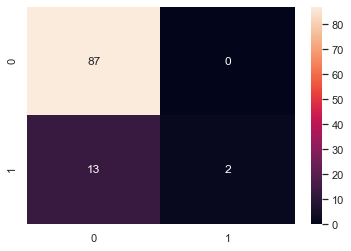

In [26]:
rf = RandomForestClassifier(n_estimators=47, max_depth=9, random_state=SEED)
run_model_(rf, X_train, y_train, X_test, y_test, 2)


Cross validation Avg. f1_score: 0.09808612440191386
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00        36

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        87
           1       1.00      0.13      0.24        15

    accuracy                           0.87       102
   macro avg       0.94      0.57      0.58       102
weighted avg       0.89      0.87      0.83       102

Testing MCC: 0.34058772731852804


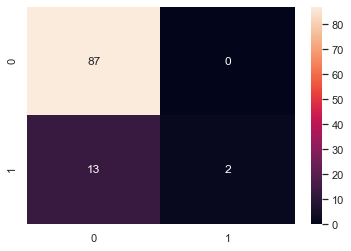

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


ada_tree = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=27, learning_rate=0.46, random_state=SEED)

gnb = GaussianNB()

rf = RandomForestClassifier(n_estimators=47, max_depth=9, random_state=SEED)

ada_lr = AdaBoostClassifier(
    LogisticRegression(class_weight='balanced'), algorithm="SAMME", n_estimators=7, learning_rate=0.95, random_state=SEED)

vc = VotingClassifier(
    estimators=[ ('ada', ada_tree), ('rf', ada_lr), ], voting='hard')

run_model_(vc, X_train, y_train, X_test, y_test, 2)


# Saving the results from final model

Best model is AdaBoost with hyperparameters:

AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=17, learning_rate=0.06, random_state=SEED)

Cross validation Avg. f1_score: 0.0733018973859381
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00        36

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        87
           1       1.00      0.13      0.24        15

    accuracy                           0.87       102
   macro avg       0.94      0.57      0.58       102
weighted avg       0.89      0.87      0.83       102

Testing MCC: 0.34058772731852804


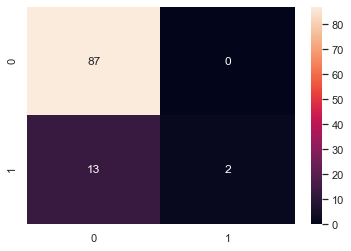

In [41]:

best_model = VotingClassifier(
    estimators=[('ada', ada_tree), ('rf', ada_lr), ], voting='hard')


run_model_(best_model, X_train, y_train, X_test, y_test, 3)


In [56]:
np.savetxt(f"predict/{''.join(x for x in target if x.isalnum())}.csv",
           best_model.predict(pre_process(X_gen_res, p_values)), delimiter=',')


# SVM (If you have time)

Cross validation Avg. f1_score: 0.7272727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        29
           1       0.80      0.40      0.53        10

    accuracy                           0.82        39
   macro avg       0.81      0.68      0.71        39
weighted avg       0.82      0.82      0.80        39

Testing MCC: 0.47739999005770767


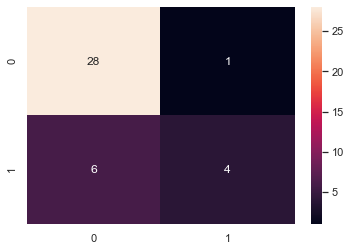

In [110]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',degree=3 , C=0.1, gamma=0.1, random_state=SEED)
run_model_(svc, X_train, y_train, X_test, y_test, 2)

# Grid Search

In [152]:
from sklearn.model_selection import GridSearchCV

n_estimators = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lr = np.arange(0.05,1,0.05)

params = dict(n_estimators=n_estimators, learning_rate=lr)

ada_lr = AdaBoostClassifier(
    LogisticRegression(solver='lbfgs', max_iter=1), algorithm="SAMME", random_state=SEED)

grid_model = GridSearchCV(ada_lr, param_grid=params, cv=3, scoring=make_scorer(matthews_corrcoef, greater_is_better=True), n_jobs=-1, verbose=2)

grid_model.fit(X_train, y_train)

grid_model.best_score_

Fitting 3 folds for each of 285 candidates, totalling 855 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=LogisticRegression(max_iter=1),
                                          random_state=121),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring=make_scorer(matthews_corrcoef), verbose=2)

# Hyperopt for tuning the hyperparameters

In [119]:
from hyperopt import hp, fmin, tpe,Trials,STATUS_OK

space = {'n_estimators': hp.choice('n_estimators', [i for i in range(5,15)]),
         'learning_rate': hp.choice('learning_rate', [0.025, 0.05, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),
         'max_iter': hp.choice('max_iter', [1, 2, 3]),
    }

def objective(space):

    model = AdaBoostClassifier(
        LogisticRegression(solver='lbfgs', max_iter=space['max_iter']), algorithm="SAMME", n_estimators=space['n_estimators'], learning_rate=space['learning_rate'], random_state=SEED)

    # model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = space['max_depth']),
    #                            n_estimators = space['n_estimators'], 
    #                             learning_rate = space['learning_rate'],
    #                             algorithm = space['algorithm']
    #                              )
    
    mcc = cross_val_score(model, X_train,y_train, scoring=make_scorer(matthews_corrcoef, greater_is_better=True), cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -mcc,"status":STATUS_OK}


trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 10,
            trials= trials)
best


100%|██████████| 10/10 [00:25<00:00,  2.56s/trial, best loss: -0.413937780585257]


{'learning_rate': 3, 'max_iter': 1, 'n_estimators': 2}

In [ ]:
from hyperopt import hp, fmin, tpe,Trials,STATUS_OK

space = {'n_estimators': hp.choice('n_estimators', [i for i in range(5,15)]),
         'learning_rate': hp.choice('learning_rate', [0.025, 0.05, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),
         'max_iter': hp.choice('max_iter', [1, 2, 3]),
    }

def objective(space):

    model = AdaBoostClassifier(
        LogisticRegression(solver='lbfgs', max_iter=space['max_iter']), algorithm="SAMME", n_estimators=space['n_estimators'], learning_rate=space['learning_rate'], random_state=SEED)

    # model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = space['max_depth']),
    #                            n_estimators = space['n_estimators'], 
    #                             learning_rate = space['learning_rate'],
    #                             algorithm = space['algorithm']
    #                              )
    
    mcc = cross_val_score(model, X_train,y_train, scoring=make_scorer(matthews_corrcoef, greater_is_better=True), cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -mcc,"status":STATUS_OK}


trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 10,
            trials= trials)
best
